In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
#import PyPDF2
from skimage.transform import hough_line
from skimage.feature import canny
from matplotlib import cm
from scipy import ndimage as ndi
from skimage import feature
from skimage import filters
from skimage import measure
import skimage
from pdf2image import convert_from_path

from scipy import spatial
from skimage.transform import resize
from skimage.measure import regionprops
import os
import skimage
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from scipy import ndimage
from sklearn.decomposition import PCA
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

In [24]:
train_path=os.listdir("imagesdatasets/train/")
test_path=os.listdir("imagesdatasets/test/")

In [25]:
len(train_path),len(test_path)

(689, 224)

# Đọc các bảng điểm (file ảnh jpg)

In [632]:
files=os.listdir("BangdiemQuatrinh")
files[1]

'DiemthiQT_001.jpg'

In [737]:
idp=6
img = cv2.imread("BangdiemQuatrinh/"+files[idp], cv2.IMREAD_GRAYSCALE)# Anh den trang

In [714]:
#img.shape# matran 2D

(7016, 4958)

In [738]:
img_resize=cv2.resize(img, (2100,2970), interpolation = cv2.INTER_AREA)

# Quay Anh
* Xác định góc quay ảnh

In [739]:
bimage=convert_to_binary(img_resize)

In [740]:
coords=np.argwhere(bimage==0)
pca = PCA(n_components=1)
pca.fit(coords)
rot=np.arctan2(pca.components_[0][0],pca.components_[0][1])
print(rot)

0.09841029487020515


In [750]:
img_rot = ndimage.rotate(img_resize, angle=10*rot, reshape=False) # rot/2

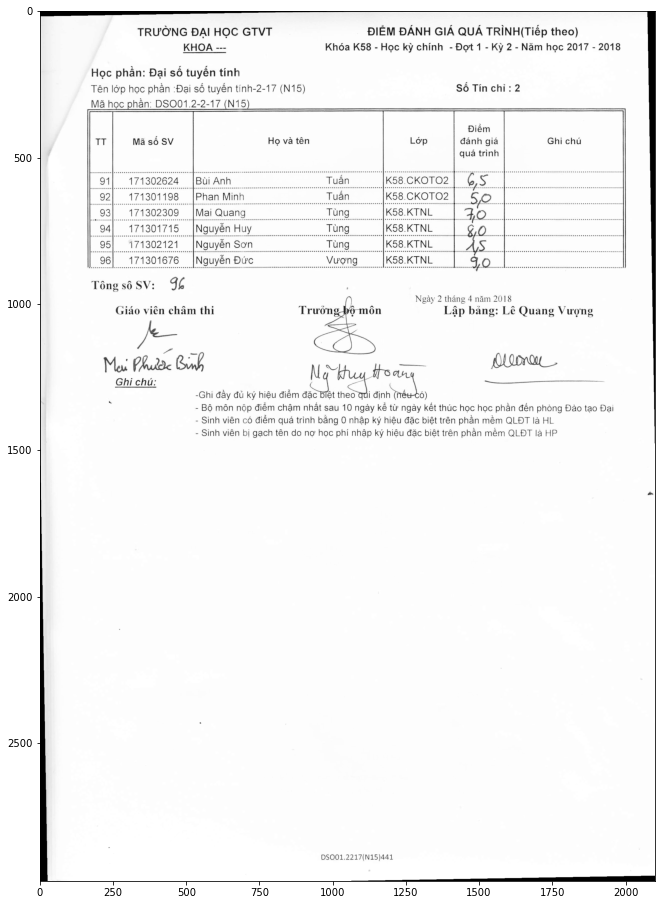

In [751]:
fig, ax = plt.subplots(figsize=(26,16))
plt.imshow(img_rot,cmap=cm.gray)
plt.show()

In [752]:
bimage=convert_to_binary(img_rot)

## Chia theo hang

In [753]:
peak_y, _ = find_peaks(bimage.sum(axis=1),distance=44)#, distance=150)(,np.less))

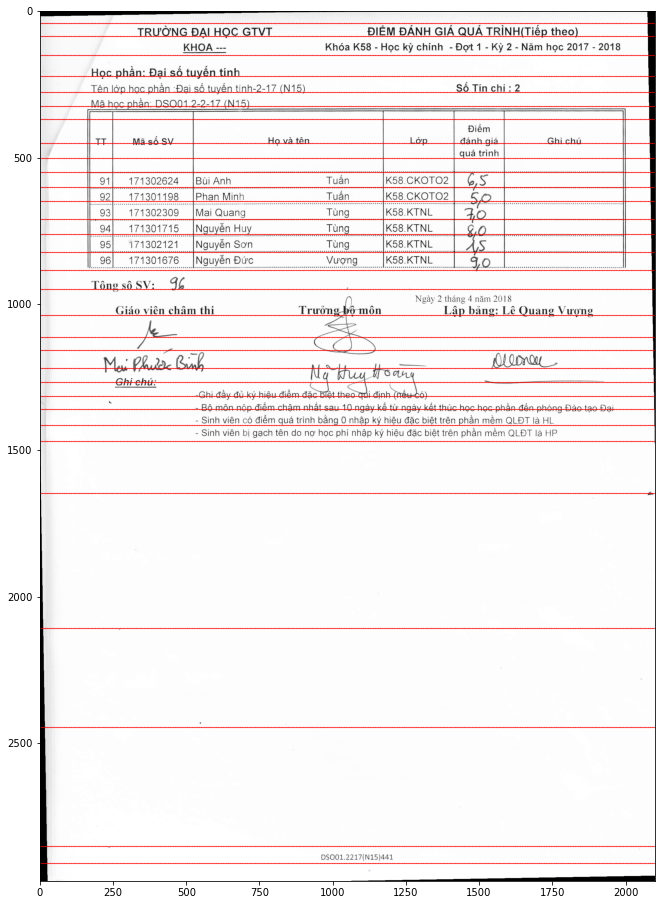

In [754]:
fig, ax = plt.subplots(figsize=(26,16))
plt.imshow(img_rot,cmap=cm.gray)
for y0 in peak_y:
        ax.plot(range(2100), (y0-15)*np.ones(2100), color='red', marker='o',linestyle='None', markersize=0.1)

plt.show()

## Chia theo cot

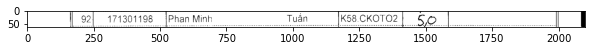

In [755]:
i=10
#line1=img_rot[peaks1[i]-15:peaks1[i+1],:]
line1=bimage[peak_y[i]-15:peak_y[i+1],:]
plt.figure(figsize=(10,6))
plt.imshow(line1,cmap=cm.gray)
plt.show()

In [756]:
idx=np.where(line1.mean(axis=0)<0.5)[0]
peak_x=idx[np.where(np.diff(idx)>50)]
peak_x

array([ 170,  249,  524, 1173, 1414, 1586, 1999], dtype=int64)

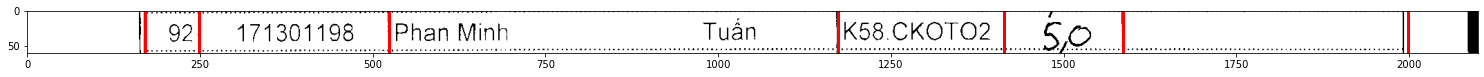

In [757]:
fig, ax = plt.subplots(figsize=(26,16))
#plt.imshow(img_rot,cmap=cm.gray)
plt.imshow(line1,cmap=cm.gray)
for x0 in peak_x:
        ax.plot( x0*np.ones(line1.shape[0]),range(line1.shape[0]), color='red', marker='o',linestyle='None', markersize=2)

plt.show()

# Ghi lai file da cat tu anh

In [758]:
os.mkdir("test/p"+str(idp))

In [759]:
n_lines=len(peak_y)
for i in range(1,n_lines-1):
    line=bimage[peak_y[i]-15:peak_y[i+1],:]
    idx=np.where(line.mean(axis=0)<0.5)[0]
    peak_x=idx[np.where(np.diff(idx)>50)]
    if (len(peak_x)>=2):
        peak_x=np.array([ 170,  249,  524, 1173, 1414, 1586, 1999])
        for j in range(len(peak_x)-1):
            box=img_rot[peak_y[i]-15:peak_y[i+1],peak_x[j]:peak_x[j+1]]
            cv2.imwrite("test/p"+str(idp)+"/p"+str(idp)+"_row_"+str(i)+"_column_"+str(j)+".png", box)
    else:
        box=img_rot[peak_y[i]-15:peak_y[i+1],:]
        cv2.imwrite("test/p"+str(idp)+"/p"+str(idp)+"_row_"+str(i)+".png", box)